In [1]:
import numpy as np
import cmath as cm
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
def dtft(x):
    N = len(x)
    freq_vals = np.linspace(-np.pi, np.pi, N)
    ft = []
    for freq in freq_vals:
        f = 0
        for i in range(N):
            f += x[i] * np.exp(-1j * freq *i)
        ft.append(f)
    mag = list(map(lambda x: (x.real ** 2 + x.imag ** 2) ** 0.5, ft))
    ang = list(map(lambda x: np.arctan(x.imag / (x.real + 1e-6)) / np.pi , ft))
    return freq_vals / np.pi, [mag[i] * np.sign(ang[i]) for i in range(N)], mag, ang

def plot_ffts(*xs):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True)
    axes[0].axhline(y=0, color='black')
    axes[1].axhline(y=0, color='black')
    
    axes[0].set_title("signed |X(jw)|", fontsize=18)
    axes[0].set_xlabel("Frequency ($\pi$)", fontsize=18)
    axes[0].set_ylabel("Signed Magnitude", fontsize=18)
    
    axes[1].set_title("|X(jw)|", fontsize=18)
    axes[1].set_xlabel("Frequency ($\pi$)", fontsize=18)
    axes[1].set_ylabel("Magnitude", fontsize=18)
    
    axes[2].set_title("ang(X(jw))", fontsize=18)
    axes[2].set_xlabel("Frequency ($\pi$)", fontsize=18)
    axes[2].set_ylabel("Angle ($\pi$)", fontsize=18)
    axes[2].set_ylim(-1.1, 1.1)
    
    ms = 0
    mn = 99999
    for i, x in enumerate(xs):
        f, smag, mag, ang = dtft(x)
        
        ms = max(ms, max(mag))
        mn = min(mn, min(smag))
        
        axes[0].plot(f, smag, label = 'Signal %d' % i)
        axes[1].plot(f, mag, label = 'Signal %d' % i)
        axes[2].plot(f, ang, label = 'Signal %d' % i)

    axes[0].set_ylim(max(0.9 * mn - 0.1, -20), min(1.1 * ms + 0.1, 20))
    axes[1].set_ylim(-0.1, min(1.1 * ms + 0.1, 20))
    axes[2].legend()
    fig.tight_layout()

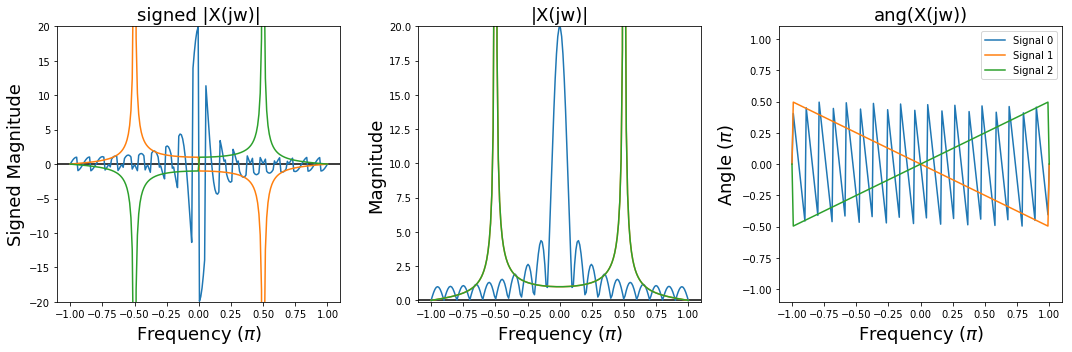

In [51]:
plot_ffts([1 if i < 20 else 0 for i in range(200)],
          [np.sin(2*np.pi / 4 *i) for i in range(200)],
          [np.cos(2*np.pi / 4 *i) for i in range(200)])